<h1 style="text-align: center;">H04U1C - Optimization of Mechatronic Systems</h1>

Consider the two-link planar robot arm described in Chapter 8 of Modern Robotics (http://modernrobotics.org/). For additional background information, you can consult this book, section 8.1.

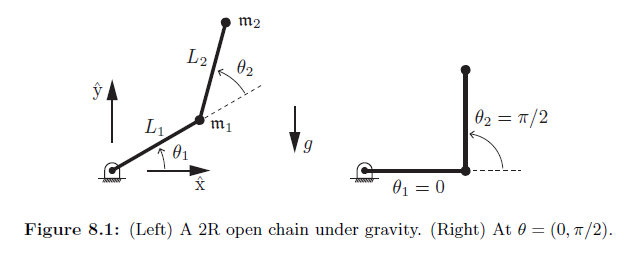

The equations of motion of this robot are given by: 

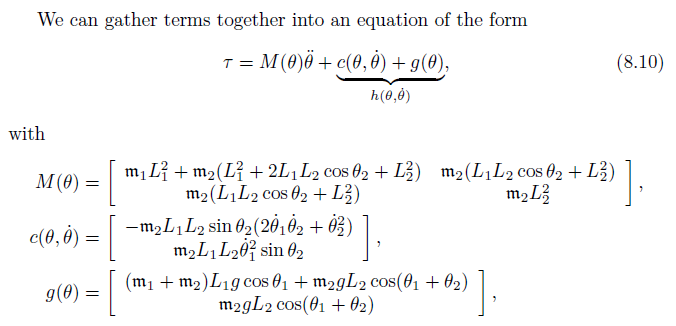

with:

* $\tau$: joint torques
* $\theta$: joint positions
* $m$: masses (assumed to be concentrated at the tip of the links)
* $L$: lengths.

Assume the following values: $L_1 = 0.5 \text{ m}$, $L_2 = 0.3 \text{ m}$, $m_1 = 3 \text{ kg}$, $m_2 = 1 \text{ kg}$.

Questions:

1. Write down the system dynamics equation for this robot in state-space form, such that we can use it in an optimal control problem, for the following two cases:

    a. case 1: assuming the robot is acceleration-controlled: the states are the joint positions $\theta$ and the joint velocities $\dot{\theta}$, and the controls are the desired joint accelerations $\ddot{\theta_r}$. You can assume that the acceleration controller is perfect, such that $\ddot{\theta_r} \equiv \ddot{\theta}$.
    
    b. case 2: assuming the robot is torque-controlled: the states are the joint positions $\theta$ and the joint velocities $\dot{\theta}$, and the controls are the desired joint torques $\tau_r$. You can assume that the torque controller is perfect, such that $\tau_r \equiv \tau$.

2. Formulate for both cases an optimal control problem that 

    a. minimizes the mean-square control effort (so mean-square joint acceleration for case 1, and mean-square joint torque for case 2), 
    
    b. moves the robot from initial joint positions $\theta_{\text{initial}} = [0.1, 0.5]^T \text{ rad}$ to terminal joint positions $\theta_{\text{terminal}} = [1.0, 1.9]^T \text{ rad}$ in $2$ seconds,

    c. starts and terminates with zero joint velocities, and

    d. the robot avoids self-collision.
    
    Implement and solve these two problems, and plot the resulting state and control trajectories.
    Are these two optimization problems convex or not? Briefly motivate your answer.

3. For case 1 (acceleration-controlled robot), formulate a time-optimal control problem that

    a. moves from initial joint positions $\theta_{\text{initial}} = [0.1, 0.5]^T \text{ rad}$ to terminal joint positions $\theta_{\text{terminal}} = [1.0, 1.9]^T \text{ rad}$ (in minimum time), and

    b. starts and terminates with zero joint velocities,

    c. satisfies the following control bounds: $-10 \text{ rad}/\text{s}^2 \leq \ddot{\theta_r} \leq 10 \text{ rad}/\text{s}^2$,

    d. the robot avoids self-collision, 

    e. the robot avoids collision with the ground (assume the ground is at $y = 0$).

    Is this problem convex or not? Briefly motivate your answer.
    Implement and solve this problem and plot the resulting state and control trajectories.

4. Write down the forward kinematics equation for this robot. This is the function $f$ such that $[x, y, \alpha]^T = f(\theta_1,\theta_2)$, with $x$, $y$ and $\alpha$ the pose (position and orientation) of the end effector ($m_2$).

5. For case 2 (torque-controlled robot), formulate an optimal control problem that

    a. minimizes the mean-square control effort (so the mean-square joint torques), and
    
    b. moves the robot from initial end effector pose $[0.8 \text{ m} , 0.0 \text{ m}, 0.0 \text{ rad}]^T$ to terminal end effector pose $[0.4 \text{ m} , 0.4 \text{ m}, 1.8 \text{ rad}]^T$ in $2$ seconds, and

    c. starts and terminates with zero joint velocities,

    d. the robot avoids self-collision, and

    e. the robot avoids collision with the ground (assume the ground is at $y = 0$).
    
    Implement and (try to) solve this problem. Do you get a solution? If yes, plot the resulting state and control trajectories. If not, explain what is problematic with the problem description, make a suggestion how we could modify the problem formulation and solve the modified problem.

## Q1 - System dynamics equation in state-space form

$
M(\theta_1, \theta_2) = \begin{bmatrix}
m_1 l_1^2 + m_2 (l_1^2 + 2 l_1 l_2 \cos(\theta_2) + l_2^2) & m_2 (l_1 l_2 \cos(\theta_2) + l_2^2) \\
m_2 (l_1 l_2 \cos(\theta_2) + l_2^2) & m_2 l_2^2
\end{bmatrix}
$

$
c(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2) = \begin{bmatrix}
-m_2 l_1 l_2 \sin(\theta_2) \dot{\theta}_2 (2 \dot{\theta}_1 + \dot{\theta}_2) \\
m_2 l_1 l_2 \sin(\theta_2) \dot{\theta}_1^2
\end{bmatrix}
$

$
g(\theta_1, \theta_2) = \begin{bmatrix}
(m_1 + m_2) l_1 g \cos(\theta_1) + m_2 l_2 g \cos(\theta_1 + \theta_2) \\
m_2 l_2 g \cos(\theta_1 + \theta_2)
\end{bmatrix}
$

Therefore, the system dynamics equation in state-space form is:

$
\begin{aligned}
    \ddot{\theta} &= M(\theta_1, \theta_2)^{-1} \Bigg( \begin{bmatrix}
    \tau_1 \\
    \tau_2
    \end{bmatrix} - c(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2) - g(\theta_1, \theta_2) \Bigg) \\
    &= \begin{bmatrix}
    m_1 l_1^2 + m_2 (l_1^2 + 2 l_1 l_2 \cos(\theta_2) + l_2^2) & m_2 (l_1 l_2 \cos(\theta_2) + l_2^2) \\
    m_2 (l_1 l_2 \cos(\theta_2) + l_2^2) & m_2 l_2^2
    \end{bmatrix}^{-1} \begin{bmatrix}
    \tau_1 + m_2 l_1 l_2 \sin(\theta_2) \dot{\theta}_2 (2 \dot{\theta}_1 + \dot{\theta}_2) - (m_1 + m_2) l_1 g \cos(\theta_1) - m_2 l_2 g \cos(\theta_1 + \theta_2)\\
    \tau_2 - m_2 l_1 l_2 \sin(\theta_2) \dot{\theta}_1^2 - m_2 l_2 g \cos(\theta_1 + \theta_2)
    \end{bmatrix}
\end{aligned} 
$

### Case 1 - Acceleration-controlled robot 

The state-space representation of this case is in linear form:  
\begin{align}
  \dot{x}(t) &= A x(t) + B u(t) \\
   y(t) &= C x(t) + D u(t)
\end{align}  

The dynamics equation in state-space model:  

$
\begin{bmatrix} \dot{\theta}_1 \\ \dot{\theta}_2 \\ \ddot{\theta}_1 \\ \ddot{\theta}_2 \end{bmatrix}=\begin{bmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{bmatrix} \begin{bmatrix} \theta_1 \\ \theta_2 \\ \dot{\theta}_1 \\ \dot{\theta}_2 \end{bmatrix}+\begin{bmatrix} 0 & 0 \\ 0 & 0 \\ 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} \ddot{\theta_1} \\ \ddot{\theta}_2 \end{bmatrix}  
$  

$
\begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{bmatrix} \begin{bmatrix} \theta_1 \\ \theta_2 \\ \dot{\theta}_1 \\ \dot{\theta}_2 \end{bmatrix}
$
   


The mean-square control effort for a system with control inputs $u(t)$ over a time horizon $[0,T]$ can be expressed as:

$ J = \frac{1}{T} \int_{0}^{T} \|u(t)\|^2 \ dt $

In [111]:
from casadi import *
from rockit import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import *

# Define the system's parameters
m1 = 3      # kg
m2 = 1      # kg
l1 = 0.5    # m
l2 = 0.3    # m
g = 9.81    # m/s^2

In [ ]:
def create_animation(sol, case, theta1, theta2, theta1_dot, theta2_dot, control1, control2, name='robot_arm_animation.gif'):
    # Sample the values from the solution
    time, theta1_sol = sol.sample(theta1, grid='integrator', refine=20)
    _, theta2_sol = sol.sample(theta2, grid='integrator', refine=20)
    _, theta1_dot_sol = sol.sample(theta1_dot, grid='integrator', refine=20)
    _, theta2_dot_sol = sol.sample(theta2_dot, grid='integrator', refine=20)
    _, control1_sol = sol.sample(control1, grid='integrator', refine=20)
    _, control2_sol = sol.sample(control2, grid='integrator', refine=20)

    # Calculate the positions of the joints and end effector
    x1 = l1 * np.cos(theta1_sol)
    y1 = l1 * np.sin(theta1_sol)
    x2 = x1 + l2 * np.cos(theta1_sol + theta2_sol)
    y2 = y1 + l2 * np.sin(theta1_sol + theta2_sol)

    # Create a figure and axis for the animation
    fig, axs = plt.subplots(4, 2, figsize=(15, 15))

    # Set limits and labels for the robot arm plot
    axs[0, 0].set_xlim(-l1 - l2 - 0.1, l1 + l2 + 0.1)
    axs[0, 0].set_ylim(-l1 - l2 - 0.1, l1 + l2 + 0.1)
    axs[0, 0].set_aspect('equal')
    axs[0, 0].set_title('Robot Arm Movement')
    axs[0, 0].set_xlabel('X [m]')
    axs[0, 0].set_ylabel('Y [m]')
    axs[0, 0].grid(True)
    line1, = axs[0, 0].plot([], [], 'o-', lw=2, label='Link 1')
    line2, = axs[0, 0].plot([], [], 'o-', lw=2, label='Link 2')

    # Initialize the points for the states and inputs
    theta1_points, = axs[1, 0].plot([], [], 'b.', label=r'$\theta_1$ [rad]')
    theta2_points, = axs[1, 1].plot([], [], 'r.', label=r'$\theta_2$ [rad]')
    theta1_dot_points, = axs[2, 0].plot([], [], 'b.', label=r'$\dot{\theta}_1$ [rad/s]')
    theta2_dot_points, = axs[2, 1].plot([], [], 'r.', label=r'$\dot{\theta}_2$ [rad/s]')
    control1_points, = axs[3, 0].plot([], [], 'b.', label=r'$\ddot{\theta}_1$ [rad/$s^2$]' if case == 1 else r'$\tau_1$ [Nm]')
    control2_points, = axs[3, 1].plot([], [], 'r.',label=r'$\ddot{\theta}_1$ [rad/$s^2$]' if case == 1 else r'$\tau_2$ [Nm]')

    # Set titles and labels for the plots
    axs[0, 1].axis('off')
    #axs[1, 0].set_title('Joint Angles')
    axs[1, 0].legend()
    axs[1, 0].grid(True)
    #axs[1, 1].set_title('Joint Angles')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    #axs[2, 0].set_title('Joint Velocities')
    axs[2, 0].legend()
    axs[2, 0].grid(True)
    #axs[2, 1].set_title('Joint Velocities')
    axs[2, 1].legend()
    axs[2, 1].grid(True)

    #axs[3, 0].set_title('Joint Torques')
    axs[3, 0].set_xlabel('Time [s]')
    axs[3, 0].legend()
    axs[3, 0].grid(True)
    #axs[3, 1].set_title('Joint Torques')
    axs[3, 1].set_xlabel('Time [s]')
    axs[3, 1].legend()
    axs[3, 1].grid(True)

    # Initialize the animation
    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        theta1_points.set_data([], [])
        theta2_points.set_data([], [])
        theta1_dot_points.set_data([], [])
        theta2_dot_points.set_data([], [])
        control1_points.set_data([], [])
        control2_points.set_data([], [])
        
        return line1, line2, theta1_points, theta2_points, theta1_dot_points, theta2_dot_points, control1_points, control2_points

    # Update function for the animation
    def padded_update(frame):
        if frame < len(time):  # Normal animation frames
            line1.set_data([0, x1[frame]], [0, y1[frame]])
            line2.set_data([x1[frame], x2[frame]], [y1[frame], y2[frame]])
            theta1_points.set_data(time[:frame], theta1_sol[:frame])
            theta2_points.set_data(time[:frame], theta2_sol[:frame])
            theta1_dot_points.set_data(time[:frame], theta1_dot_sol[:frame])
            theta2_dot_points.set_data(time[:frame], theta2_dot_sol[:frame])
            control1_points.set_data(time[:frame], control1_sol[:frame])
            control2_points.set_data(time[:frame], control2_sol[:frame])
        else:  # Pause by holding the last frame
            last_frame = len(time) - 1
            line1.set_data([0, x1[last_frame]], [0, y1[last_frame]])
            line2.set_data([x1[last_frame], x2[last_frame]], [y1[last_frame], y2[last_frame]])
            theta1_points.set_data(time, theta1_sol)
            theta2_points.set_data(time, theta2_sol)
            theta1_dot_points.set_data(time, theta1_dot_sol)
            theta2_dot_points.set_data(time, theta2_dot_sol)
            control1_points.set_data(time, control1_sol)
            control2_points.set_data(time, control2_sol)

        # Autoscale the axes
        axs[1, 0].relim()
        axs[1, 0].autoscale_view()
        axs[1, 1].relim()
        axs[1, 1].autoscale_view()
        axs[2, 0].relim()
        axs[2, 0].autoscale_view()
        axs[2, 1].relim()
        axs[2, 1].autoscale_view()
        axs[3, 0].relim()
        axs[3, 0].autoscale_view()
        axs[3, 1].relim()
        axs[3, 1].autoscale_view()

        return line1, line2, theta1_points, theta2_points, theta1_dot_points, theta2_dot_points, control1_points, control2_points

    # Create the animation
    animation = FuncAnimation(fig=fig, func=padded_update, frames=len(time)+int(1000/20), init_func=init, blit=True)
    animation.save(name, writer='pillow')

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      148
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       20

Total number of variables............................:       64
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       48
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.90e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

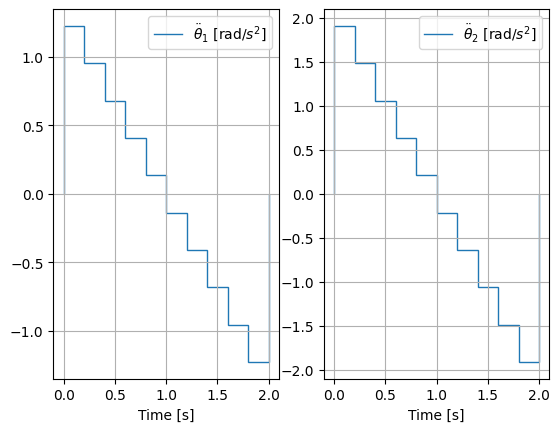

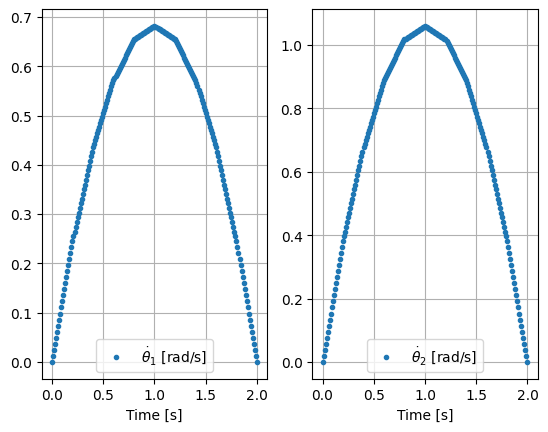

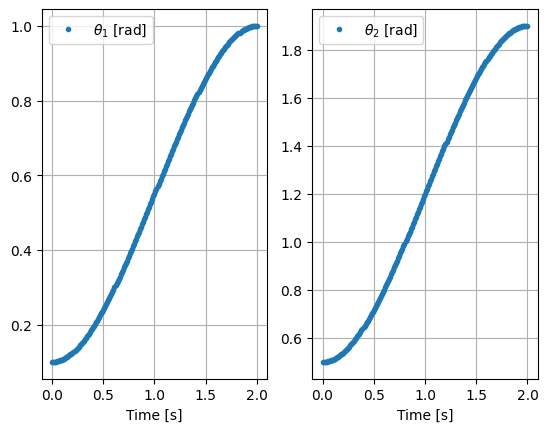

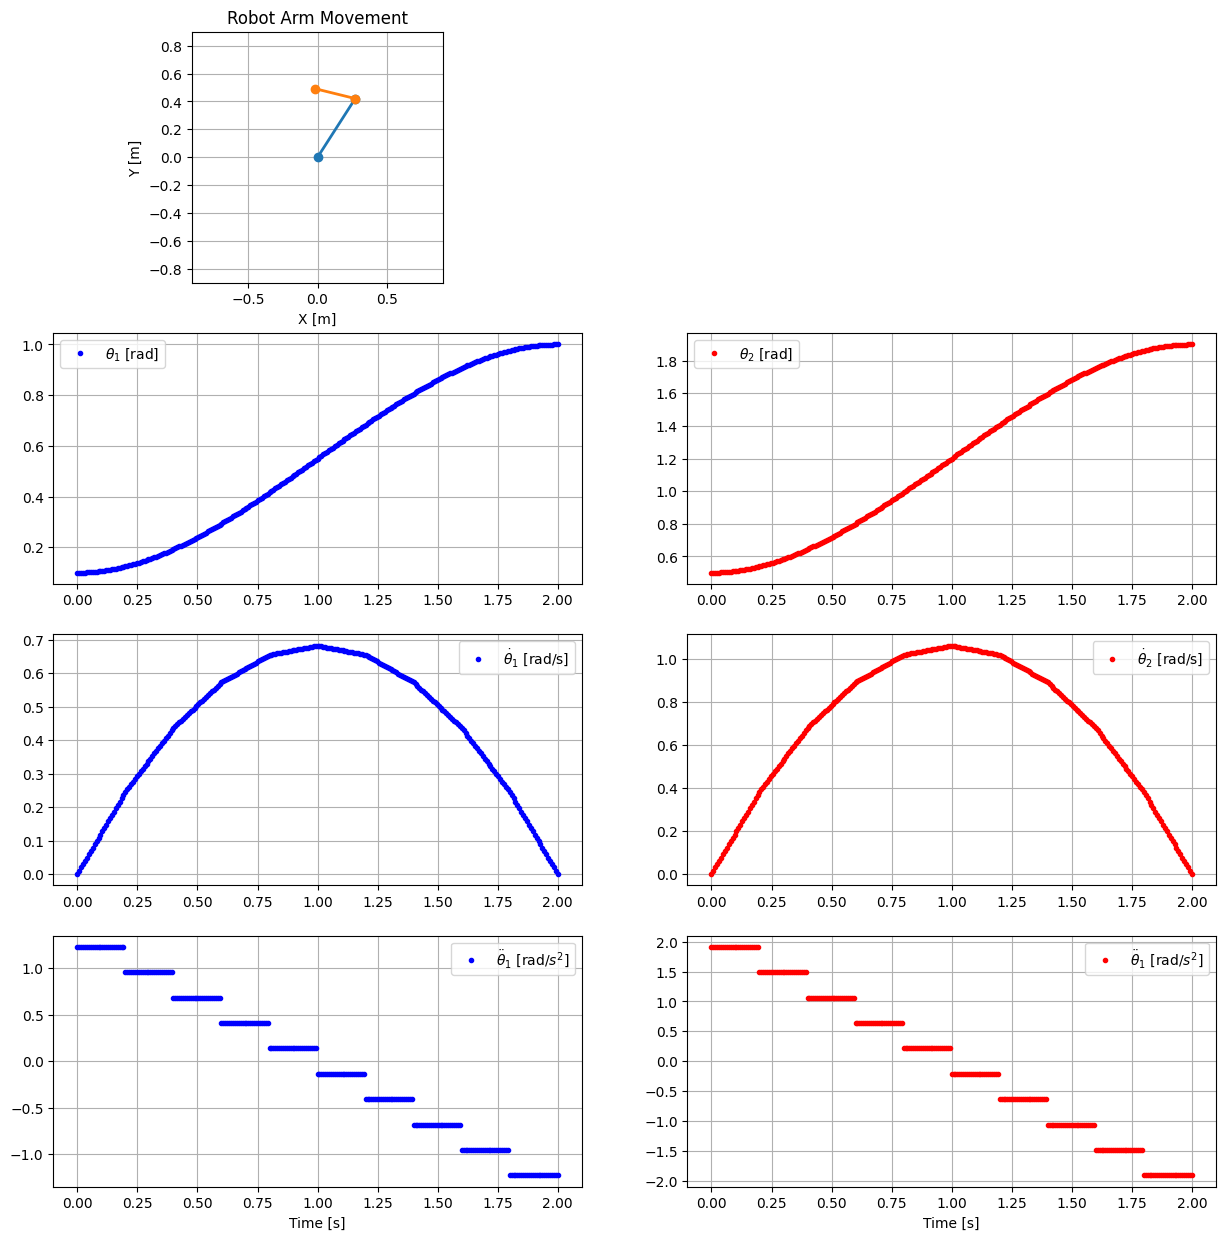

In [ ]:
def manipulator(case, animation=False):
    # Define the dynamics
    def M(theta1, theta2):
        return vertcat(horzcat(m1*l1**2 + m2*(l1**2 + 2*l1*l2*cos(theta2) + l2**2), m2*(l1*l2*cos(theta2) + l2**2)),
                        horzcat(m2*(l1*l2*cos(theta2) + l2**2), m2*l2**2) )

    def c(theta1, theta2, theta1_dot, theta2_dot):
        return vertcat(-m2*l1*l2*sin(theta2)*theta2_dot*(2*theta1_dot + theta2_dot),
                    m2*l1*l2*sin(theta2)*theta1_dot**2)

    def g(theta1, theta2):
        return vertcat((m1 + m2)*l1*9.81*cos(theta1) + m2*l2*9.81*cos(theta1+theta2),
                    m2*l2*9.81*cos(theta1+theta2))

    def f(theta1, theta2, theta1_dot, theta2_dot, torque1=0, torque2=0): # Returns \ddot{\theta} = M^(-1) * (torque - c - g) 
        M_ = M(theta1, theta2)
        c_ = c(theta1, theta2, theta1_dot, theta2_dot)
        g_ = g(theta1, theta2)
        return solve(M_, vertcat(torque1 - c_[0] - g_[0], torque2 - c_[1] - g_[1]))

    ocp = Ocp(T=2.0) # Time horizon

    # Define the states
    theta1 = ocp.state()
    theta2 = ocp.state()
    theta1_dot = ocp.state()
    theta2_dot = ocp.state()

    # Defince controls
    if case == 1:
        theta1_ddot = ocp.control()
        theta2_ddot = ocp.control()
    elif case == 2:
        torque1 = ocp.control()
        torque2 = ocp.control()

    # Specify ODE
    ocp.set_der(theta1, theta1_dot)
    ocp.set_der(theta2, theta2_dot)
    if case == 1:
        ocp.set_der(theta1_dot, theta1_ddot)
        ocp.set_der(theta2_dot, theta2_ddot)
    elif case == 2:
        ocp.set_der(theta1_dot, f(theta1, theta2, theta1_dot, theta2_dot, torque1, torque2)[0])
        ocp.set_der(theta2_dot, f(theta1, theta2, theta1_dot, theta2_dot, torque1, torque2)[1])

    # Lagrange objective
    if case == 1:
        obj = ocp.integral(theta1_ddot**2 + theta2_ddot**2) / 2
    elif case == 2:
        obj = ocp.integral(torque1**2 + torque2**2) / 2
    ocp.add_objective(obj)

    # Motion constraints
    epsilon = 1e-2
    ocp.subject_to(theta2 <= pi - epsilon)  # Ensure theta2 is less than pi - epsilon
    ocp.subject_to(theta2 >= -pi + epsilon)  # Ensure theta2 is greater than -pi + epsilon
    # check if this is enough to avoid self-collision

    # Initial constraints
    ocp.subject_to(ocp.at_t0(theta1)==0.1)
    ocp.subject_to(ocp.at_t0(theta2)==0.5)
    ocp.subject_to(ocp.at_t0(theta1_dot)==0.)
    ocp.subject_to(ocp.at_t0(theta2_dot)==0.)

    # End constraints
    ocp.subject_to(ocp.at_tf(theta1)==1.0)
    ocp.subject_to(ocp.at_tf(theta2)==1.9)
    ocp.subject_to(ocp.at_tf(theta1_dot)==0.)
    ocp.subject_to(ocp.at_tf(theta2_dot)==0.)

    # Pick a solver
    ocp.solver('ipopt')

    # Pick a solution method
    ocp.method(MultipleShooting(N=10, M=1, intg='rk'))

    # Solve the OCP
    sol = ocp.solve()

    # Plot the solution
    if case == 1:
        t_u1, theta1_ddot_sol = sol.sample(theta1_ddot, grid='control')
        t_u2, theta2_ddot_sol = sol.sample(theta2_ddot, grid='control')
    elif case == 2:
        t_u1, torque1_sol = sol.sample(torque1, grid='control')
        t_u2, torque2_sol = sol.sample(torque2, grid='control')
    
    t_x1, theta1_sol = sol.sample(theta1,  grid='integrator', refine=20)
    t_x2, theta2_sol = sol.sample(theta2,  grid='integrator', refine=20)
    t_x3, theta1_dot_sol = sol.sample(theta1_dot,  grid='integrator', refine=20)
    t_x4, theta2_dot_sol = sol.sample(theta2_dot,  grid='integrator', refine=20)

    if case == 1:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.stairs(theta1_ddot_sol[:-1], t_u1, label=r'$\ddot{\theta}_1$ [rad/$s^2$]')
        plt.xlabel("Time [s]")
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.stairs(theta2_ddot_sol[:-1], t_u2, label=r'$\ddot{\theta}_2$ [rad/$s^2$]')
        plt.xlabel("Time [s]")
        plt.legend()
        plt.grid(True)
        plt.show()
        
    elif case == 2:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.stairs(torque1_sol[:-1], t_u1, label=r'$\tau_1$ [Nm]')
        plt.xlabel("Time [s]")
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.stairs(torque2_sol[:-1], t_u2, label=r'$\tau_2$ [Nm]')
        plt.xlabel("Time [s]")
        plt.legend()
        plt.grid(True)
        plt.show()

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(t_x3, theta1_dot_sol, '.', label=r'$\dot{\theta}_1$ [rad/s]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t_x4, theta2_dot_sol, '.', label=r'$\dot{\theta}_2$ [rad/s]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(t_x1, theta1_sol, '.', label=r'$\theta_1$ [rad]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t_x2, theta2_sol, '.', label=r'$\theta_2$ [rad]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create the animation
    if animation:
        if case == 1:
            name = 'Q1_1.gif'
            create_animation(sol, case, theta1, theta2, theta1_dot, theta2_dot, theta1_ddot, theta2_ddot, name=name)
        elif case == 2:
            name = 'Q1_2.gif'
            create_animation(sol, case, theta1, theta2, theta1_dot, theta2_dot, torque1, torque2, name=name)

    return sol

# Optimal control problem
sol = manipulator(1, animation=False)

### Case 2 - Torque-controlled robot

 The state-space model of this case is a nonliner model:
\begin{align}
   \dot{x} &= f( x ,  u) \\
    y &= h( x , u)
\end{align}

The dynamics equation in state-space model:  
$
\begin{bmatrix} 
\dot{\theta}_1 \\ \dot{\theta}_2 \\ \ddot{\theta}_1 \\ \ddot{\theta}_2 \end{bmatrix} = \begin{bmatrix} \dot{\theta}_1 \\ \dot{\theta}_2 \\ \mathbf{M}(\theta)^{-1} [\tau(\theta) - \mathbf{c}(\theta, \dot{\theta}) - \mathbf{g}(\theta)] \end{bmatrix} 
$  
$
\begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{bmatrix} \begin{bmatrix} \theta_1 \\ \theta_2 \\ \dot{\theta}_1 \\ \dot{\theta}_2 \end{bmatrix}
$

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      288
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:      210

Total number of variables............................:       64
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       48
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.74e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

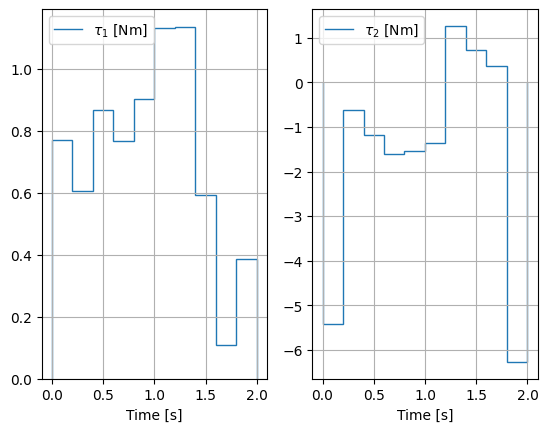

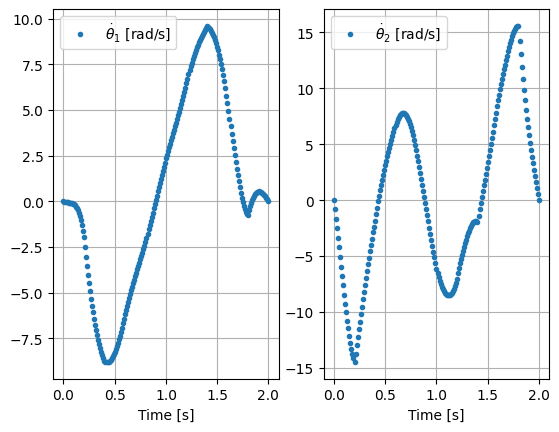

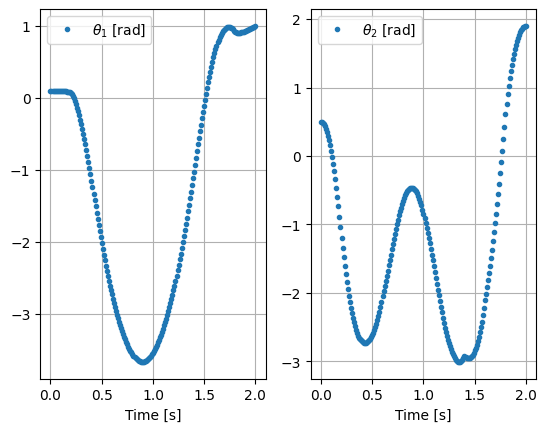

UnboundLocalError: local variable 'theta1_ddot' referenced before assignment

In [ ]:
# Optimal control problem
sol = manipulator(2, animation=False)

## Q3 - Time-optimal control problem

3. For case 1 (acceleration-controlled robot), formulate a time-optimal control problem that

    a. moves from initial joint positions $\theta_{\text{initial}} = [0.1, 0.5]^T \text{ rad}$ to terminal joint positions $\theta_{\text{terminal}} = [1.0, 1.9]^T \text{ rad}$ (in minimum time), and

    b. starts and terminates with zero joint velocities,

    c. satisfies the following control bounds: $-10 \text{ rad}/\text{s}^2 \leq \ddot{\theta_r} \leq 10 \text{ rad}/\text{s}^2$,

    d. the robot avoids self-collision, 

    e. the robot avoids collision with the ground (assume the ground is at $y = 0$).

    Is this problem convex or not? Briefly motivate your answer.
    Implement and solve this problem and plot the resulting state and control trajectories.


### To check if it makes sense for the acceleration to be plotted as stairs

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      188
Number of nonzeros in inequality constraint Jacobian.:      100
Number of nonzeros in Lagrangian Hessian.............:       74

Total number of variables............................:       65
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       48
Total number of inequality constraints...............:       89
        inequality constraints with only lower bounds:       56
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       33

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.0000000e+00 1.90e+00 2.41e-02  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

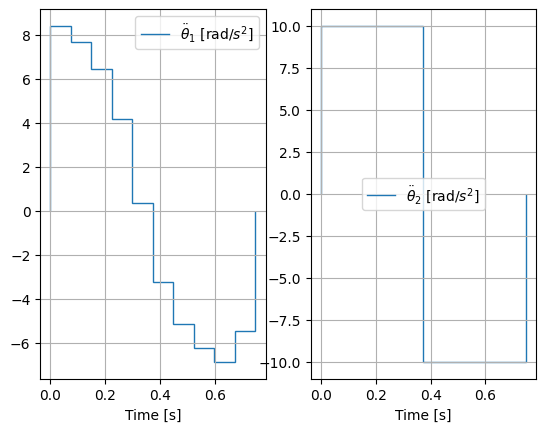

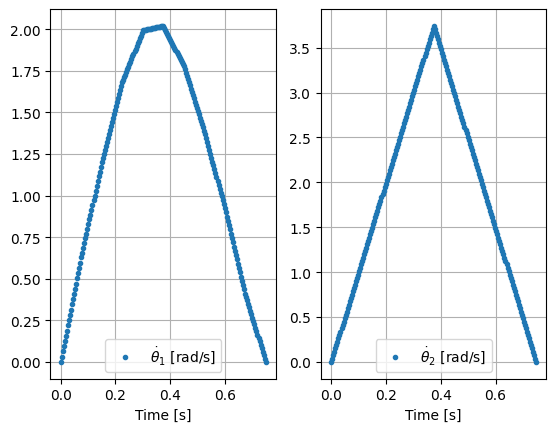

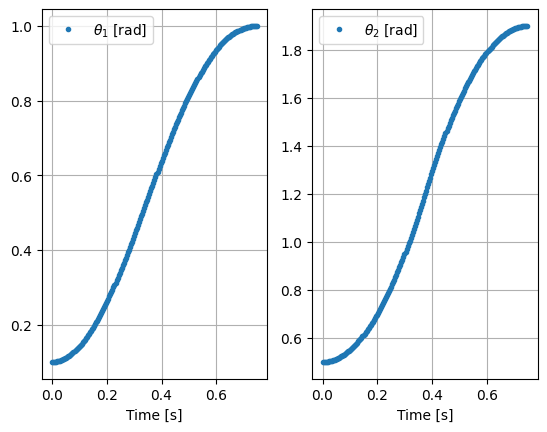

In [ ]:
def manipulator_time_optimal(animation=False):
    # Define the dynamics
    def M(theta1, theta2):
        return vertcat(horzcat(m1*l1**2 + m2*(l1**2 + 2*l1*l2*cos(theta2) + l2**2), m2*(l1*l2*cos(theta2) + l2**2)),
                        horzcat(m2*(l1*l2*cos(theta2) + l2**2), m2*l2**2) )

    def c(theta1, theta2, theta1_dot, theta2_dot):
        return vertcat(-m2*l1*l2*sin(theta2)*theta2_dot*(2*theta1_dot + theta2_dot),
                    m2*l1*l2*sin(theta2)*theta1_dot**2)

    def g(theta1, theta2):
        return vertcat((m1 + m2)*l1*9.81*cos(theta1) + m2*l2*9.81*cos(theta1+theta2),
                    m2*l2*9.81*cos(theta1+theta2))

    def f(theta1, theta2, theta1_dot, theta2_dot, torque1=0, torque2=0): # Returns \ddot{\theta} = M^(-1) * (torque - c - g) 
        M_ = M(theta1, theta2)
        c_ = c(theta1, theta2, theta1_dot, theta2_dot)
        g_ = g(theta1, theta2)
        return solve(M_, vertcat(torque1 - c_[0] - g_[0], torque2 - c_[1] - g_[1]))

    ocp = Ocp(T=FreeTime(1.0)) # Time horizon

    # Define the states
    theta1 = ocp.state()
    theta2 = ocp.state()
    theta1_dot = ocp.state()
    theta2_dot = ocp.state()

    # Defince controls
    theta1_ddot = ocp.control()
    theta2_ddot = ocp.control()

    # Specify ODE
    ocp.set_der(theta1, theta1_dot)
    ocp.set_der(theta2, theta2_dot)
    ocp.set_der(theta1_dot, theta1_ddot)
    ocp.set_der(theta2_dot, theta2_ddot)

    # Lagrange objective
    ocp.add_objective(ocp.T)

    # Motion constraints
    epsilon = 1e-2
    # check if this is enough to avoid self-collision
    ocp.subject_to(theta2 <= pi - epsilon)  # Ensure theta2 is less than pi - epsilon
    ocp.subject_to(theta2 >= -pi + epsilon)  # Ensure theta2 is greater than -pi + epsilon
    # acceleration limits
    ocp.subject_to(theta1_ddot <= 10)
    ocp.subject_to(theta1_ddot >= -10)
    ocp.subject_to(theta2_ddot <= 10)
    ocp.subject_to(theta2_ddot >= -10)
    # avoid collision with the ground
    y_position_link1 = l1 * sin(theta1)
    y_position_end_effector = l1 * sin(theta1) + l2 * sin(theta1 + theta2)
    ocp.subject_to(y_position_link1 >= 0)
    ocp.subject_to(y_position_end_effector >= 0)

    # Initial constraints
    ocp.subject_to(ocp.at_t0(theta1)==0.1)
    ocp.subject_to(ocp.at_t0(theta2)==0.5)
    ocp.subject_to(ocp.at_t0(theta1_dot)==0.)
    ocp.subject_to(ocp.at_t0(theta2_dot)==0.)

    # End constraints
    ocp.subject_to(ocp.at_tf(theta1)==1.0)
    ocp.subject_to(ocp.at_tf(theta2)==1.9)
    ocp.subject_to(ocp.at_tf(theta1_dot)==0.)
    ocp.subject_to(ocp.at_tf(theta2_dot)==0.)

    # Pick a solver
    ocp.solver('ipopt')

    # Pick a solution method
    ocp.method(MultipleShooting(N=10, M=1, intg='rk'))

    # Solve the OCP
    sol = ocp.solve()

    # Plot the solution
    t_u1, theta1_ddot_sol = sol.sample(theta1_ddot, grid='control')
    t_u2, theta2_ddot_sol = sol.sample(theta2_ddot, grid='control')
    t_x1, theta1_sol = sol.sample(theta1,  grid='integrator', refine=20)
    t_x2, theta2_sol = sol.sample(theta2,  grid='integrator', refine=20)
    t_x3, theta1_dot_sol = sol.sample(theta1_dot,  grid='integrator', refine=20)
    t_x4, theta2_dot_sol = sol.sample(theta2_dot,  grid='integrator', refine=20)

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.stairs(theta1_ddot_sol[:-1], t_u1, label=r'$\ddot{\theta}_1$ [rad/$s^2$]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.stairs(theta2_ddot_sol[:-1], t_u2, label=r'$\ddot{\theta}_2$ [rad/$s^2$]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(t_x3, theta1_dot_sol, '.', label=r'$\dot{\theta}_1$ [rad/s]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t_x4, theta2_dot_sol, '.', label=r'$\dot{\theta}_2$ [rad/s]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(t_x1, theta1_sol, '.', label=r'$\theta_1$ [rad]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t_x2, theta2_sol, '.', label=r'$\theta_2$ [rad]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create animation
    if animation:
        create_animation(sol=sol, case=1, theta1=theta1, theta2=theta2, theta1_dot=theta1_dot, 
                        theta2_dot=theta2_dot, control1=theta1_ddot, control2=theta2_ddot, name='Q3.gif')

    return sol

# Optimal control problem
sol = manipulator_time_optimal(animation=False)

## Q4 - Forward kinematics equation

The transformation matrix ${}^0T_1$ is given by:

$
{}^0T_1 = \begin{bmatrix}
\cos(\theta_1) & -\sin(\theta_1) & 0 & l_1 \cos(\theta_1) \\
\sin(\theta_1) & \cos(\theta_1) & 0 & l_1 \sin(\theta_1) \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$

The transformation matrix ${}^1T_2$ is given by:

$
{}^1T_2 = \begin{bmatrix}
\cos(\theta_2) & -\sin(\theta_2) & 0 & l_2 \cos(\theta_2) \\
\sin(\theta_2) & \cos(\theta_2) & 0 & l_2 \sin(\theta_2) \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$

The combined transformation matrix ${}^0T_2$ is given by:

$
\begin{aligned}
    {}^0T_2 &= {}^0T_1 {}^1T_2 \\
    &= \begin{bmatrix}
    \cos(\theta_1 + \theta_2) & -\sin(\theta_1 + \theta_2) & 0 & l_1 \cos(\theta_1) + l_2 \cos(\theta_1 + \theta_2) \\
    \sin(\theta_1 + \theta_2) & \cos(\theta_1 + \theta_2) & 0 & l_1 \sin(\theta_1) + l_2 \sin(\theta_1 + \theta_2) \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
    \end{bmatrix}
\end{aligned}
$

From ${}^0T_2$, the position and orientation of the end effector can be derived as follows:

The $x$-coordinate of the end effector:
$
x_{\text{ee}} = {}^0T_2[0, 3]
$

The $y$-coordinate of the end effector:
$
y_{\text{ee}} = {}^0T_2[1, 3]
$

The yaw angle (orientation) of the end effector:
$
\text{yaw}_{\text{ee}} = \text{atan2}({}^0T_2[1, 0], {}^0T_2[0, 0])
$

In [ ]:
def forward_kinematics(theta1, theta2):
    T_01 = vertcat(horzcat(cos(theta1), -sin(theta1), 0, l1*cos(theta1)),
                horzcat(sin(theta1), cos(theta1), 0, l1*sin(theta1)),
                horzcat(0, 0, 1, 0),
                horzcat(0, 0, 0, 1))
    T_12 = vertcat(horzcat(cos(theta2), -sin(theta2), 0, l2*cos(theta2)),
                horzcat(sin(theta2), cos(theta2), 0, l2*sin(theta2)),
                horzcat(0, 0, 1, 0),
                horzcat(0, 0, 0, 1))
    T_02 = mtimes(T_01, T_12)

    T_des = vertcat(horzcat(cos(theta1+theta2), -sin(theta1+theta2), 0, l1*cos(theta1)+l2*cos(theta1+theta2)),
                horzcat(sin(theta1+theta2), cos(theta1+theta2), 0, l1*sin(theta1)+l2*sin(theta1+theta2)),
                horzcat(0, 0, 1, 0),
                horzcat(0, 0, 0, 1))
    print (T_02 - T_des)

    # From T_02, derive the position and the orientation of the end effector
    x_ee = T_02[0, 3]
    y_ee = T_02[1, 3]
    yaw_ee = atan2(T_02[1, 0], T_02[0, 0])
    
    return x_ee, y_ee, yaw_ee

# Test forward kinematics
#x_ee, y_ee, yaw_ee = forward_kinematics(0.1, 0.5)
#print(f'End effector position and yaw: ({x_ee}, {y_ee}, {yaw_ee})')


[[0, 0, 0, 0], 
 [0, 0, 0, 0], 
 [0, 0, 0, 0], 
 [0, 0, 0, 0]]
End effector position and yaw: (0.74510276711192, 0.21930945034192, 0.6)


## Q5 - Torque-controlled robot

5. For case 2 (torque-controlled robot), formulate an optimal control problem that

    a. minimizes the mean-square control effort (so the mean-square joint torques), and
    
    b. moves the robot from initial end effector pose $[0.8 \text{ m} , 0.0 \text{ m}, 0.0 \text{ rad}]^T$ to terminal end effector pose $[0.4 \text{ m} , 0.4 \text{ m}, 1.8 \text{ rad}]^T$ in $2$ seconds, and

    c. starts and terminates with zero joint velocities,

    d. the robot avoids self-collision, and

    e. the robot avoids collision with the ground (assume the ground is at $y = 0$).

In [ ]:
def manipulator_torque_optimal(animation=False):
    # Define the dynamics
    def M(theta1, theta2):
        return vertcat(horzcat(m1*l1**2 + m2*(l1**2 + 2*l1*l2*cos(theta2) + l2**2), m2*(l1*l2*cos(theta2) + l2**2)),
                        horzcat(m2*(l1*l2*cos(theta2) + l2**2), m2*l2**2) )

    def c(theta1, theta2, theta1_dot, theta2_dot):
        return vertcat(-m2*l1*l2*sin(theta2)*theta2_dot*(2*theta1_dot + theta2_dot),
                    m2*l1*l2*sin(theta2)*theta1_dot**2)

    def g(theta1, theta2):
        return vertcat((m1 + m2)*l1*9.81*cos(theta1) + m2*l2*9.81*cos(theta1+theta2),
                    m2*l2*9.81*cos(theta1+theta2))

    def f(theta1, theta2, theta1_dot, theta2_dot, torque1=0, torque2=0): # Returns \ddot{\theta} = M^(-1) * (torque - c - g) 
        M_ = M(theta1, theta2)
        c_ = c(theta1, theta2, theta1_dot, theta2_dot)
        g_ = g(theta1, theta2)
        return solve(M_, vertcat(torque1 - c_[0] - g_[0], torque2 - c_[1] - g_[1]))

    ocp = Ocp(T=2.0) # Time horizon

    # Define the states
    theta1 = ocp.state()
    theta2 = ocp.state()
    theta1_dot = ocp.state()
    theta2_dot = ocp.state()

    # Defince controls
    torque1 = ocp.control()
    torque2 = ocp.control()

    # Specify ODE
    ocp.set_der(theta1, theta1_dot)
    ocp.set_der(theta2, theta2_dot)
    ocp.set_der(theta1_dot, f(theta1, theta2, theta1_dot, theta2_dot, torque1, torque2)[0])
    ocp.set_der(theta2_dot, f(theta1, theta2, theta1_dot, theta2_dot, torque1, torque2)[1])

    # Lagrange objective
    obj = ocp.integral(torque1**2 + torque2**2) / 2
    ocp.add_objective(obj)

    # Motion constraints
    epsilon = 1e-2
    # check if this is enough to avoid self-collision
    ocp.subject_to(theta2 <= pi - epsilon)  # Ensure theta2 is less than pi - epsilon
    ocp.subject_to(theta2 >= -pi + epsilon)  # Ensure theta2 is greater than -pi + epsilon
    # avoid collision with the ground
    y_position_link1 = l1 * sin(theta1)
    ocp.subject_to(y_position_link1 >= 0) # y_link1 >= 0
    ocp.subject_to(forward_kinematics(theta1, theta2)[1] >= 0) # y_ee >= 0

    # Initial constraints
    ocp.subject_to(ocp.at_t0(forward_kinematics(theta1, theta2)[0])== 0.8) # x_ee = 0.8
    ocp.subject_to(ocp.at_t0(forward_kinematics(theta1, theta2)[1])== 0.) # y_ee = 0.0
    ocp.subject_to(ocp.at_t0(forward_kinematics(theta1, theta2)[2])== 0.) # yaw_ee = 0.0
    ocp.subject_to(ocp.at_t0(theta1_dot)==0.)
    ocp.subject_to(ocp.at_t0(theta2_dot)==0.)

    # End constraints
    ocp.subject_to(ocp.at_tf(forward_kinematics(theta1, theta2)[0])==0.4) # x_ee = 0.4
    ocp.subject_to(ocp.at_tf(forward_kinematics(theta1, theta2)[1])==0.4) # y_ee = 0.4
    ocp.subject_to(ocp.at_tf(forward_kinematics(theta1, theta2)[2])==1.8) # yaw_ee = 1.8
    ocp.subject_to(ocp.at_tf(theta1_dot)==0.)
    ocp.subject_to(ocp.at_tf(theta2_dot)==0.)

    # Pick a solver
    ocp.solver('ipopt')

    # Pick a solution method
    ocp.method(MultipleShooting(N=10, M=1, intg='rk'))

    # Solve the OCP
    sol = ocp.solve()

    # Plot the solution
    t_u1, torque1_sol = sol.sample(torque1, grid='control')
    t_u2, torque2_sol = sol.sample(torque2, grid='control')
    t_x1, theta1_sol = sol.sample(theta1,  grid='integrator', refine=20)
    t_x2, theta2_sol = sol.sample(theta2,  grid='integrator', refine=20)
    t_x3, theta1_dot_sol = sol.sample(theta1_dot,  grid='integrator', refine=20)
    t_x4, theta2_dot_sol = sol.sample(theta2_dot,  grid='integrator', refine=20)

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.stairs(torque1_sol[:-1], t_u1, label=r'$\tau_1$ [Nm]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.stairs(torque2_sol[:-1], t_u2, label=r'$\tau_2$ [Nm]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(t_x3, theta1_dot_sol, '.', label=r'$\dot{\theta}_1$ [rad/s]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t_x4, theta2_dot_sol, '.', label=r'$\dot{\theta}_2$ [rad/s]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.plot(t_x1, theta1_sol, '.', label=r'$\theta_1$ [rad]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(t_x2, theta2_sol, '.', label=r'$\theta_2$ [rad]')
    plt.xlabel("Time [s]")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create animation
    if animation:
        create_animation(sol=sol, theta1=theta1, theta2=theta2, theta1_dot=theta1_dot, 
                        theta2_dot=theta2_dot, control1=torque1, control2=torque2, name='Q5.gif')

    return sol

# Optimal control problem
sol = manipulator_torque_optimal(animation=False)

(mac(horzcat(horzcat(cos(x1), (-sin(x1)), 0, (0.5*cos(x1)))', horzcat(sin(x1), cos(x1), 0, (0.5*sin(x1)))', [[0, 0, 1, 0]]', [[0, 0, 0, 1]]')',horzcat(horzcat(cos(x2), (-sin(x2)), 0, (0.3*cos(x2)))', horzcat(sin(x2), cos(x2), 0, (0.3*sin(x2)))', [[0, 0, 1, 0]]', [[0, 0, 0, 1]]')',zeros(4x4))-horzcat(horzcat(cos((x1+x2)), (-sin((x1+x2))), 0, ((0.5*cos(x1))+(0.3*cos((x1+x2)))))', horzcat(sin((x1+x2)), cos((x1+x2)), 0, ((0.5*sin(x1))+(0.3*sin((x1+x2)))))', [[0, 0, 1, 0]]', [[0, 0, 0, 1]]')')
(mac(horzcat(horzcat(cos(x1), (-sin(x1)), 0, (0.5*cos(x1)))', horzcat(sin(x1), cos(x1), 0, (0.5*sin(x1)))', [[0, 0, 1, 0]]', [[0, 0, 0, 1]]')',horzcat(horzcat(cos(x2), (-sin(x2)), 0, (0.3*cos(x2)))', horzcat(sin(x2), cos(x2), 0, (0.3*sin(x2)))', [[0, 0, 1, 0]]', [[0, 0, 0, 1]]')',zeros(4x4))-horzcat(horzcat(cos((x1+x2)), (-sin((x1+x2))), 0, ((0.5*cos(x1))+(0.3*cos((x1+x2)))))', horzcat(sin((x1+x2)), cos((x1+x2)), 0, ((0.5*sin(x1))+(0.3*sin((x1+x2)))))', [[0, 0, 1, 0]]', [[0, 0, 0, 1]]')')
(mac(horzcat

RuntimeError: Error in Opti::solve [OptiNode] at .../casadi/core/optistack.cpp:165:
.../casadi/core/optistack_internal.cpp:1030: Assertion "return_success(accept_limit)" failed:
Solver failed. You may use opti.debug.value to investigate the latest values of variables. return_status is 'Infeasible_Problem_Detected'